In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# <p style='text-align: center; text-decoration: underline; color: purple'>Analytics</p>

In [17]:
df = pd.read_csv('df_fit.csv')
df.head()

,ID,Mass_(kg),CO2_emission_(g/km),Fuel_type,Engine_size,Fuel_consumption_(l/100km)
0,49995318,1365.0,136.0,petrol,1.332,6.0
1,76504792,1539.0,142.0,petrol,1.332,6.3
2,52291350,1639.0,127.0,petrol,1.598,5.6
3,80878899,1835.0,171.0,diesel,1.950,6.5
4,50747853,1611.0,172.0,petrol,1.498,7.6


In [18]:
print(df.shape)
df.describe()

(1000000, 6)


,ID,Mass_(kg),CO2_emission_(g/km),Engine_size,Fuel_consumption_(l/100km)
count,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,6.422869e+07,1520.421463,153.038192,1.634355,6.514756
std,2.098104e+07,299.813454,31.000520,0.606031,1.237978
min,1.000000e+00,658.000000,44.000000,0.875000,5.500000
25%,5.184385e+07,1295.000000,133.000000,1.199000,5.800000
50%,7.479178e+07,1441.000000,144.000000,1.498000,6.200000
75%,8.087395e+07,1680.000000,160.000000,1.984000,6.800000
max,1.496951e+08,3950.000000,572.000000,7.993000,25.200000


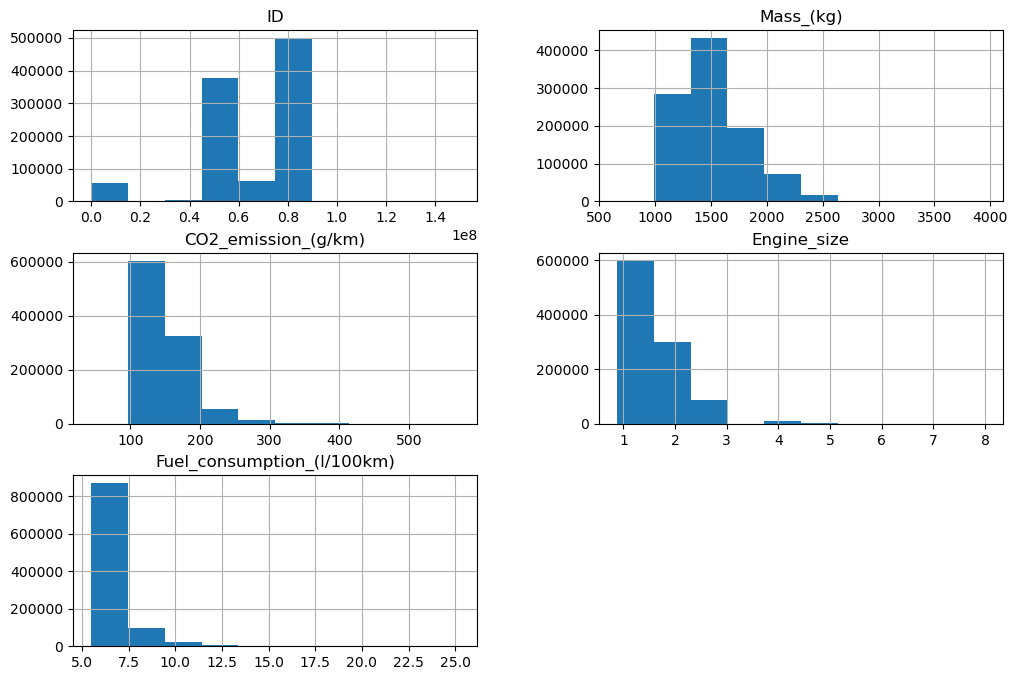

In [19]:
df.hist(figsize=(12, 8))
plt.show()

In [20]:
df1 = df[(df['Mass_(kg)'] >= 900) & (df['Mass_(kg)'] <= 3000)]
df1.head()

,ID,Mass_(kg),CO2_emission_(g/km),Fuel_type,Engine_size,Fuel_consumption_(l/100km)
0,49995318,1365.0,136.0,petrol,1.332,6.0
1,76504792,1539.0,142.0,petrol,1.332,6.3
2,52291350,1639.0,127.0,petrol,1.598,5.6
3,80878899,1835.0,171.0,diesel,1.950,6.5
4,50747853,1611.0,172.0,petrol,1.498,7.6


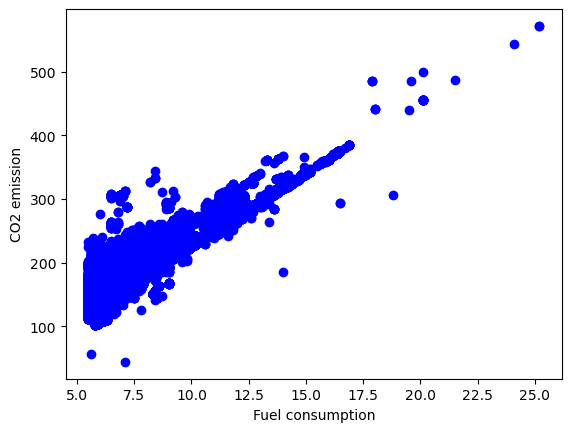

In [21]:
plt.scatter(df['Fuel_consumption_(l/100km)'], df['CO2_emission_(g/km)'], color='blue')
plt.xlabel('Fuel consumption')
plt.ylabel('CO2 emission')
plt.show()

In [22]:
df.sort_values('CO2_emission_(g/km)')

,ID,Mass_(kg),CO2_emission_(g/km),Fuel_type,Engine_size,Fuel_consumption_(l/100km)
7117,56397347,2235.0,44.0,diesel,2.925,7.1
394293,83608938,2327.0,57.0,petrol,1.969,5.6
515601,659024,1300.0,102.0,petrol,1.498,5.8
40163,626390,1300.0,102.0,petrol,1.498,5.8
720283,609497,1300.0,102.0,petrol,1.498,5.8
...,...,...,...,...,...,...
726177,79416183,2080.0,487.0,petrol,7.993,21.5
832898,56769266,1815.0,499.0,petrol,6.498,20.1
355835,79949000,1435.0,543.0,petrol,6.499,24.1
603256,77500032,2070.0,572.0,petrol,7.993,25.2


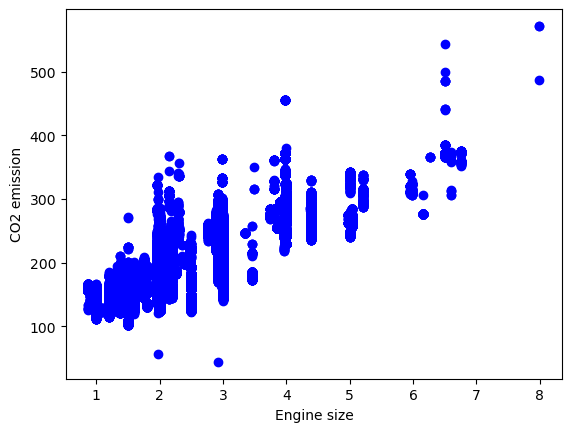

In [23]:
plt.scatter(df['Engine_size'], df['CO2_emission_(g/km)'], color='blue')
plt.xlabel('Engine size')
plt.ylabel('CO2 emission')
plt.show()

---

## Modelo de regresion lineal

### Entrenamiento

In [24]:
msk = np.random.rand(len(df)) < 0.8 #msk = mask. Lista de len(df) numeros aleatorios entre el 0 y 1. aproximadamente el 80% del conjunto (<0.8)
train = df[msk]
test = df[~msk]

In [25]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Engine_size']])
train_y = np.asanyarray(train[['CO2_emission_(g/km)']])
regr.fit(train_x, train_y)

#Coeficientes
print('Pendiente:', regr.coef_)
print('Interseccion', regr.intercept_)

Pendiente: [[38.70255246]]
Interseccion [89.77559602]


##### Graficamos el resultado

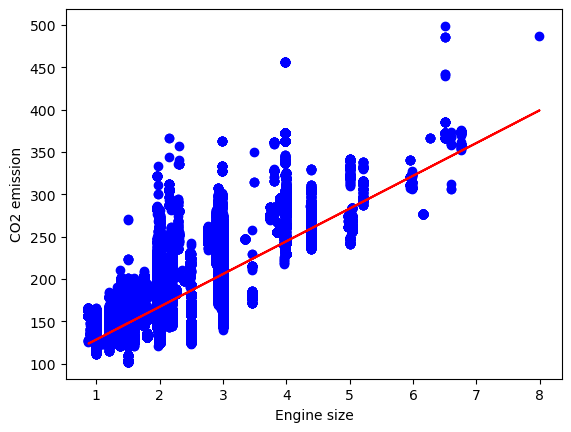

In [26]:
plt.scatter(train['Engine_size'], train['CO2_emission_(g/km)'], color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel('Engine size')
plt.ylabel('CO2 emission')
plt.show()

### Testeo

In [27]:
from sklearn.metrics import r2_score, mean_squared_error

test_x = np.asanyarray(test[['Engine_size']])
test_y = np.asanyarray(test[['CO2_emission_(g/km)']])
test_y_ = regr.predict(test_x)

print('Error medio absoluto: %.2f' % np.mean(np.absolute(test_y_ - test_y)))
print('Residual de la suma de los cuadrados (MSE): %0.2f' % np.mean((test_y_ - test_y)**2))
print('R2-score: %0.2f' % r2_score(test_y, test_y_))

Error medio absoluto: 13.93
Residual de la suma de los cuadrados (MSE): 412.63
R2-score: 0.58


---
---
---
---
---

c:\Users\matia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


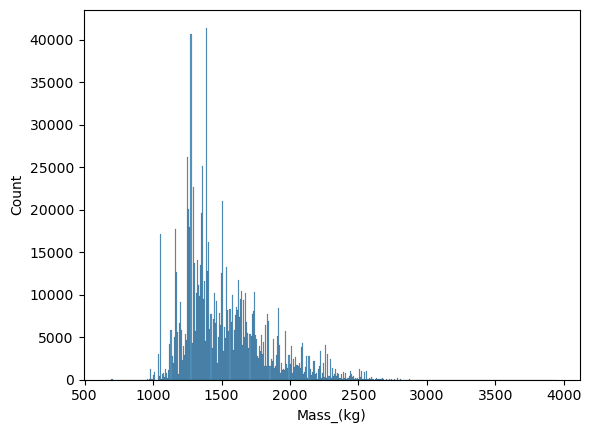

In [28]:
sns.histplot(df['Mass_(kg)'])
plt.show()

c:\Users\matia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


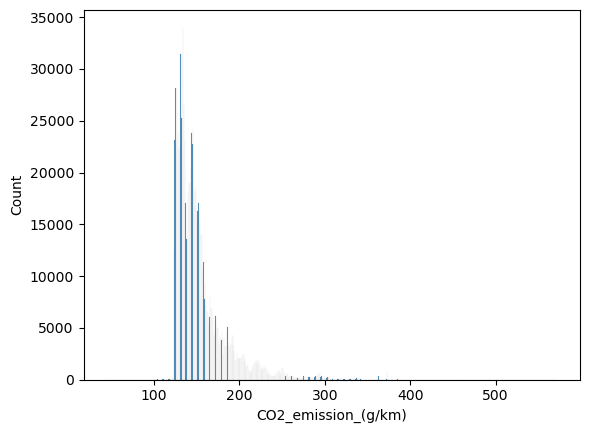

In [29]:
sns.histplot(df['CO2_emission_(g/km)'])
plt.show()

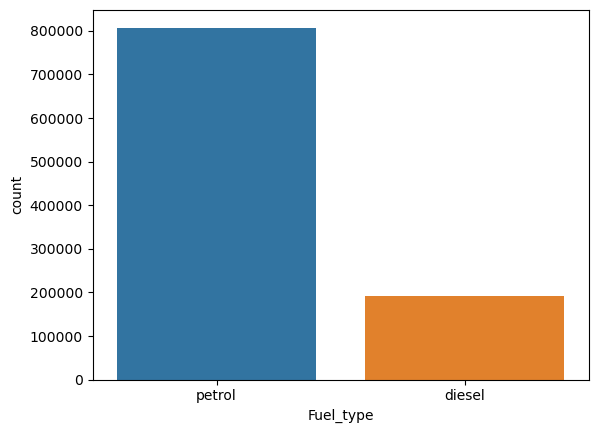

In [30]:
sns.countplot(x='Fuel_type', data=df)
plt.show()

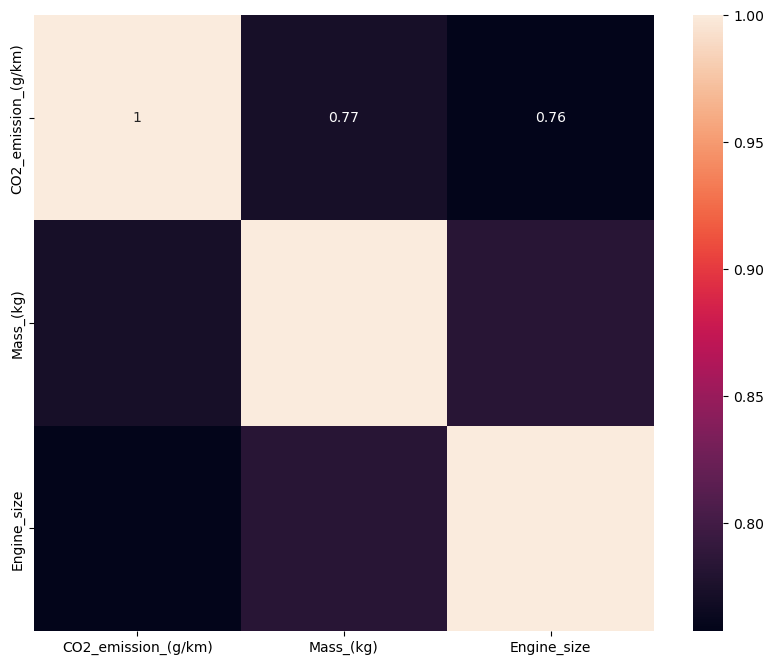

In [31]:
# Calcular la matriz de correlación
correlation_matrix = df[['CO2_emission_(g/km)', 'Mass_(kg)', 'Engine_size']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [32]:
df2 = pd.get_dummies(df, columns=['Fuel_type'], drop_first=True)

from sklearn.model_selection import train_test_split
x = df2.drop('CO2_emission_(g/km)', axis=1)
y = df2['CO2_emission_(g/km)']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

Mean Squared Error:  26.037272299970336
R2 Score:  0.9728727594349861


In [34]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

Mean Squared Error:  2.1663122194444444
R2 Score:  0.9977430019535547
